In [1]:
#Miguel Angel Martinez Moncada 1945469 Practica 2 Descriptive statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

#Se imprime el dataset
print(df)


      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


In [2]:
#Aqui se presentan las estadisticas descriptivas.

# Convertir a numpy arrays
vendedor_1 = df['vendedor_1'].to_numpy()
vendedor_2 = df['vendedor_2'].to_numpy()
producto = df['producto'].to_numpy()
fechas = pd.to_datetime(df['fecha'], dayfirst=True).to_numpy()

# valor_1
print("vendedor 1:")
print("  Media:", np.mean(vendedor_1))
print("  Desviación estándar:", np.std(vendedor_1))
print("  Mínimo:", np.min(vendedor_1))
print("  Máximo:", np.max(vendedor_1))

# valor_2
print("\nvendedor 2:")
print("  Media:", np.mean(vendedor_2))
print("  Desviación estándar:", np.std(vendedor_2))
print("  Mínimo:", np.min(vendedor_2))
print("  Máximo:", np.max(vendedor_2))

vendedor 1:
  Media: 5.0132
  Desviación estándar: 2.2256292952780794
  Mínimo: 0
  Máximo: 15

vendedor 2:
  Media: 6.9998
  Desviación estándar: 2.6773494280724734
  Mínimo: 0
  Máximo: 21


In [3]:
#Aqui se agrupa los valores de los vendedores 1 y 2 por el codigo de producto que tienen donde mean es la media y count es la cantidad.
grouped = df.groupby('producto').agg({
    'vendedor_1': ['mean', 'count'],
    'vendedor_2': ['mean', 'count']
})
#Se imprimen los datos agrupados.
print(grouped)

          vendedor_1       vendedor_2      
                mean count       mean count
producto                                   
AIRE2200    5.116910   479   6.751566   479
CAMARAHD    5.077710   489   7.235174   489
CELULAA01   4.945344   494   7.129555   494
CONSOLA9    4.989879   494   7.143725   494
DRONE99     4.927565   497   6.845070   497
IMPRES33    5.023033   521   6.840691   521
LAPTOP15    5.060669   478   6.926778   478
SMARTWAT    5.116858   522   6.978927   522
TABLET10    4.987261   471   6.940552   471
TV42        4.899099   555   7.183784   555


In [4]:
from pyomo.environ import *

model = ConcreteModel()

# Conjunto de índices
n = len(df)
model.I = RangeSet(0, n - 1)

# Parámetros
valor_1_dict = {i: vendedor_1[i] for i in range(n)}
valor_2_dict = {i: vendedor_2[i] for i in range(n)}

model.valor_1 = Param(model.I, initialize=valor_1_dict)
model.valor_2 = Param(model.I, initialize=valor_2_dict)

# Variables: x[i] = 1 si se selecciona el registro i
model.x = Var(model.I, domain=Binary)

# Restricción: que la suma total de valor_2 seleccionados no pase 1,000,000
model.restriccion = Constraint(expr=sum(model.valor_2[i] * model.x[i] for i in model.I) <= 1_000_000)

# Objetivo: maximizar suma de valor_1
model.obj = Objective(expr=sum(model.valor_1[i] * model.x[i] for i in model.I), sense=maximize)

# Resolver
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar qué registros fueron seleccionados
seleccionados = [i for i in model.I if model.x[i].value == 1]
print(f"Seleccionados: {len(seleccionados)} registros")

Seleccionados: 4966 registros


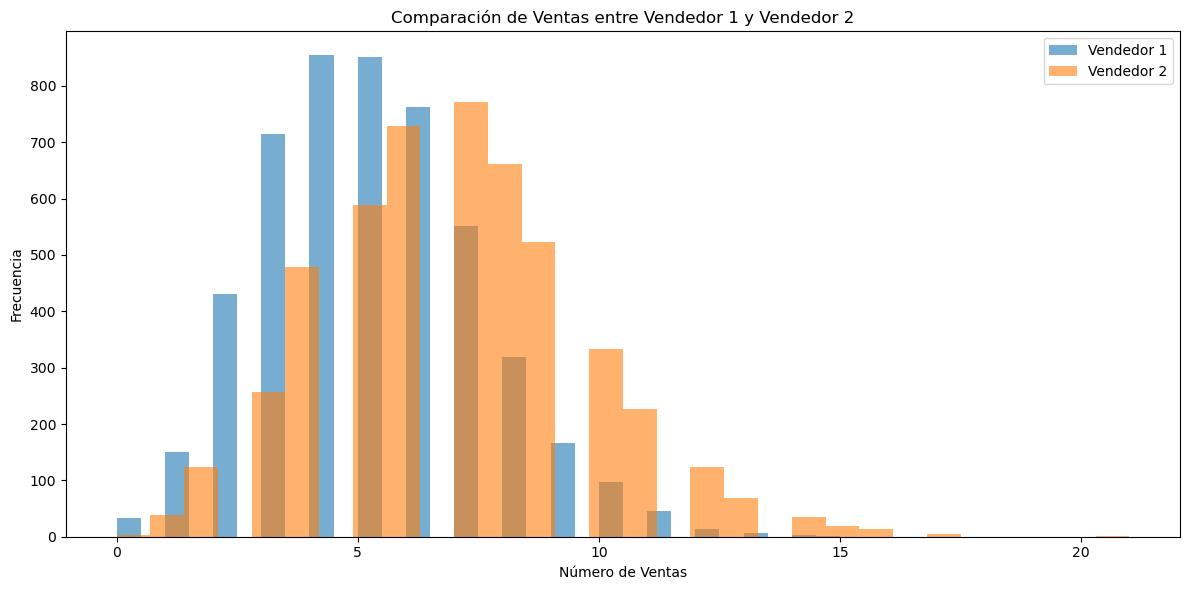

In [5]:
#Grafico con la relacion de ventas entre los vendedores
plt.figure(figsize=(12, 6))
plt.hist(df['vendedor_1'], bins=30, alpha=0.6, label='Vendedor 1')
plt.hist(df['vendedor_2'], bins=30, alpha=0.6, label='Vendedor 2')
plt.title('Comparación de Ventas entre Vendedor 1 y Vendedor 2')
plt.xlabel('Número de Ventas')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


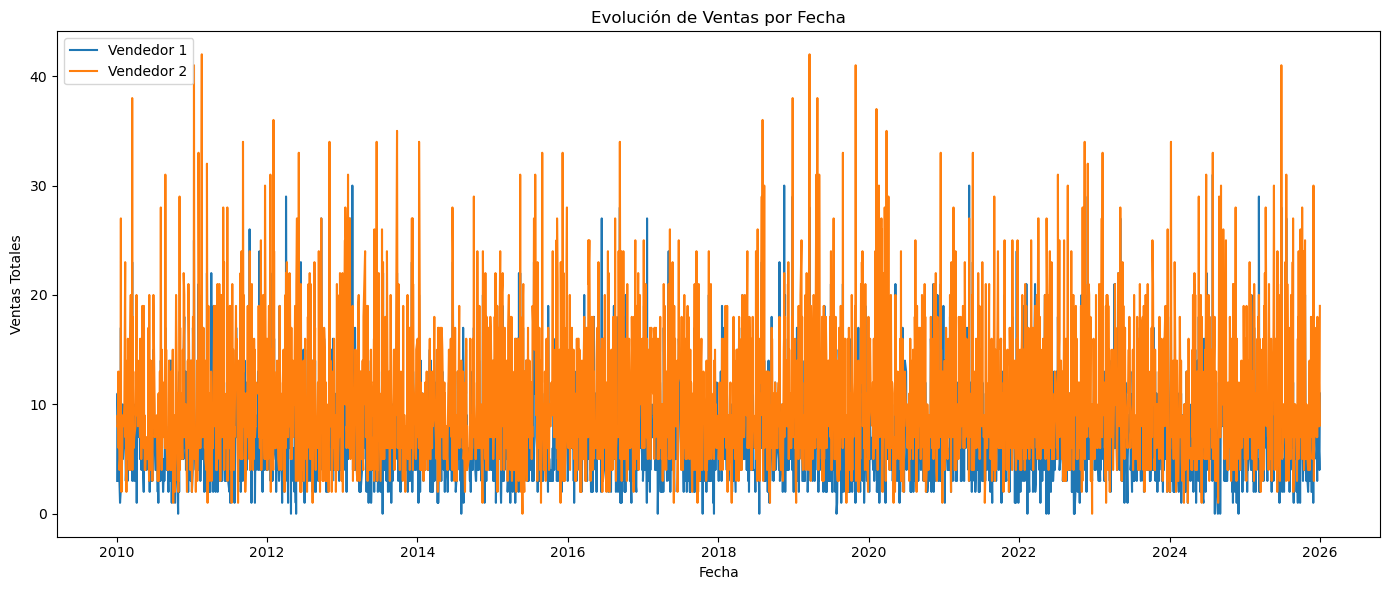

In [6]:
#Grafico con la relacion de ventas con la fecha

# Asegurar formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

# Agrupar ventas por fecha
ventas_por_fecha = df.groupby('fecha')[['vendedor_1', 'vendedor_2']].sum().sort_index()

# Crear gráfico de línea
plt.figure(figsize=(14, 6))
plt.plot(ventas_por_fecha.index, ventas_por_fecha['vendedor_1'], label='Vendedor 1')
plt.plot(ventas_por_fecha.index, ventas_por_fecha['vendedor_2'], label='Vendedor 2')
plt.title('Evolución de Ventas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.tight_layout()
plt.show()